## Lab_3 
1. Изменить модель регрессии, добавив в неё дополнительный регрессор, ранее не вошедший в состав модели, порождающей данные. Не генерируя новых данных, найти точечные оценки всех параметров расширенной модели.
2. Построить доверительные интервалы для каждого параметра модели регрессии.
3. Проверить гипотезу о значимости каждого параметра модели.
4. Проверить гипотезу о значимости самой регрессии.
5. Рассчитать прогнозные значения для математического ожидания функции отклика для всего интервала действия одного из факторов, зафиксировав значения других факторов на границе или в центре области их определения.
6. Построить график прогнозных значений и доверительной полосы для математического ожидания функции отклика и для самого отклика.
7. Заново смоделировать исходные данные (см. лаб. работу № 1), увеличив мощность случайной помехи до 50…70 % от мощности полезного сигнала и провести оценку параметров. Повторить пункты 3, 4 с новыми данными. 

### 1. Изменить модель регрессии, добавив в неё дополнительный регрессор, ранее не вошедший в состав модели, порождающей данные. Не генерируя новых данных, найти точечные оценки всех параметров расширенной модели


In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import random

f_old = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2]) 
teta_old = np.array([0.001, 1, 0.001, 0.0001, 1])
u_old = lambda x1, x2: 0.001 + 1/x1 + x1* 0.001 + x2*0.0001 + x2**2

# Добавим регрессор x2/x1
f = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2, x2*x1]) 
teta = np.array([0.001, 1, 0.001, 0.0001, 1, 0.0015])
u = lambda x1, x2: 0.001 + 1/x1 + x1* 0.001 + x2*0.0001 + 1*x2**2 + x2*x1*0.0015

# Генерирует точки (120)
def generateData():
    import random as rnd

    x1_points = []
    x2_points = []

    for s in range(0, 120):
        x2_points.append((rnd.random() - 0.5) * 2)

    for s in range(0, 60):
        x1_points.append(-rnd.random() * 5 - 1)
        x1_points.append(rnd.random() * 5 + 1)
    return x1_points, x2_points

# Строит модель из 2 лабы
def lab_2(f, teta, u, x1_array, x2_array, p):   
    vector_u = list()

    # Рассчиатли U
    for i in range(len(x1_array)):
        vector_u.append(u(x1_array[i], x2_array[i]))

    vect_arr_u = np.array(vector_u)
    average_u = vect_arr_u.mean()

    w2 = np.dot(vect_arr_u - average_u, vect_arr_u - average_u) / (len(vect_arr_u - 1))  
    sig = p * (w2)**0.5

    # Сгенерировали U с помехами (y)
    y = []
    for i in range(len(x1_array)):
        y.append(vector_u[i] + np.random.normal(0, sig))
    
    # Построение матрицы X
    X = []
    for i in range(len(teta)):
        X.append([])
        for j in range(len(x1_array)):
            X[i].append(f(x1_array[j], x2_array[j])[i])

    X = np.matrix(X)

    Q_ = X.dot(X.T)
    Q_ = np.linalg.inv(Q_)
    Q_ = Q_.dot(X)
    Q_ = Q_ * np.matrix(y).T
    
    e = []
    e = y - (X.T).dot(np.matrix(teta).T).T
    sigma2 = float(e.dot(e.T)/(len(vect_arr_u)-len(teta))) # Несмещенная оценка оценка дисперсии

    F = sigma2 / sig**2
        
    return Q_, F, X, sigma2, y, vector_u

In [2]:
x1_arr, x2_arr = generateData()

# Оценки старой модели
Q_old, F_old, X_old, sig2_old, y_old, u_old = lab_2(f_old, teta_old, u_old, x1_arr, x2_arr, 0.13)
print(Q_old, sig2_old, F_old)

# Оценки новой модели
Q, F, X, sig2, y, u_arr = lab_2(f, teta, u, x1_arr, x2_arr, 0.13)
print(Q, sig2, F)

[[-0.00785149]
 [ 1.02301399]
 [-0.0012084 ]
 [-0.00166556]
 [ 1.02167121]] 0.0034946103611030303 0.8562466765648139
[[-0.00177432]
 [ 1.00822056]
 [ 0.0016084 ]
 [-0.00836576]
 [ 1.01976852]
 [ 0.00256665]] 0.00373139825008057 0.9150241482269316


### 2. Построить доверительные интервалы для каждого параметра модели регрессии

In [3]:
t_alpha = stats.t.ppf(0.975, 114) 

def point2(X, sig2, Q, t_alpha):
    djj = np.diagonal(np.linalg.inv(X.dot(X.T)))
    sigma_qj = np.diagonal(sig2 * np.linalg.inv(X.dot(X.T)))**0.5

    Q_min = Q - t_alpha * np.matrix(sigma_qj).T
    Q_max = Q + t_alpha * np.matrix(sigma_qj).T
    return djj, Q_min, Q_max, sigma_qj

djj, Q_min, Q_max, sigma_qj = point2(X, sig2, Q, t_alpha)

print(Q_min.T)
print()
print(Q.T)
print()
print(Q_max.T)

t_alpha = 1.9809922979375063

[[-0.01764555  0.97346895 -0.00211688 -0.02933586  0.9804604  -0.00286086]]

[[-0.00177432  1.00822056  0.0016084  -0.00836576  1.01976852  0.00256665]]

[[0.0140969  1.04297218 0.00533369 0.01260435 1.05907664 0.00799416]]


### 3. Проверить гипотезу о незначимости каждого параметра модели

In [4]:
def check1(teta, sig2, djj):
    f=[]
    F_quant = stats.f.ppf(0.95, 114, 1) 
        
    for i in range(len(teta)):
        s = float(Q[i][0]**2/sig2/djj[i])
        f.append(s)
        print(f[i])
        
        if float(f[i]) < F_quant:
            print('Принимается')
        else:
            print('Отвергается')
        
check1(teta, sig2, djj)
print(teta)
print(Q.T[0])

F_quant = 253.19710435286177

0.04904664095187063
Принимается
3303.1382834989718
Отвергается
0.7315364615767637
Принимается
0.6245609466518053
Принимается
2641.218393861568
Отвергается
0.8776014971389531
Принимается
[1.0e-03 1.0e+00 1.0e-03 1.0e-04 1.0e+00 1.5e-03]
[[-0.00177432  1.00822056  0.0016084  -0.00836576  1.01976852  0.00256665]]


### 4. Проверить гипотезу о значимости самой регрессии

In [5]:
def check2(y, X, Q, u_arr):
    RSS=(np.array(y)-X.T.dot(Q).T)
    RSS=float(RSS.dot(RSS.T))
    RSSh=0
    for i in range(len(y)):
        RSSh+=(y[i]-np.mean(u_arr))**2
    m=6
    n=120
    q=m - 1
    F=((RSSh-RSS)/q)/(RSS/(n-m))
    string = ""
    print(F)
    
    F_quant = stats.f.ppf(0.95, 114, 6)
    
    if F < F_quant: 
        string = "Гипотеза принимается"
    else:
        string = "Гипотеза отвергается"
    return string

print(check2(y, X, Q, u_arr))    


1649.8667329761863
F_quant = 3.7065321028589793

Гипотеза отвергается


### 5. Рассчитать прогнозные значения для математического ожидания функции отклика для всего интервала действия одного из факторов, зафиксировав значения других факторов на границе или в центре области их определения

In [6]:
def sigma_nu (x1, x2) : 
    return sig2*np.array(f(x1,x2)*np.linalg.inv(X.dot(X.T))*np.matrix(f(x1,x2)).T)**0.5

nu = lambda x1, x2, Q : sum(np.array([1*Q[0], x1*Q[1], x1**2*Q[2], x2**2*Q[3], x2*Q[4], x1 * x2*Q[5]]))
nu_min = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) - t_alpha*(sigma_nu(x1,x2)[0][0]))
nu_max = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) + t_alpha*(sigma_nu(x1,x2)[0][0]))



### 6. Построить график прогнозных значений и доверительной полосы для математического ожидания функции отклика и для самого отклика

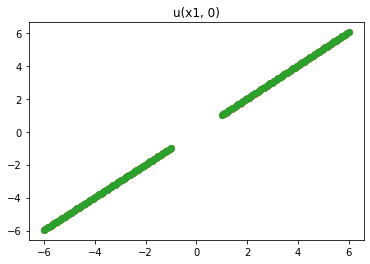

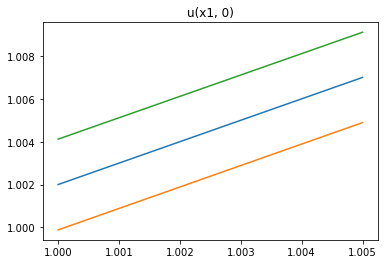

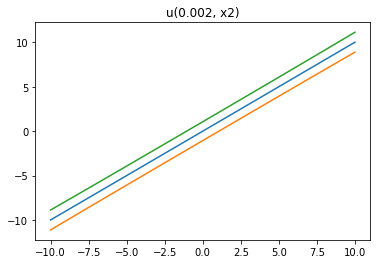

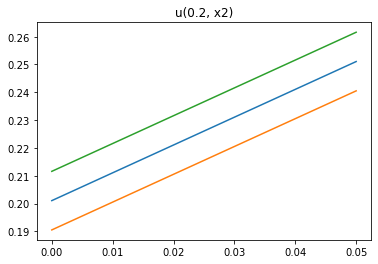

In [7]:
fig = plt.subplots()

x = []
x1 = np.linspace(-6, -1,100)
x2 = np.linspace(1, 6, 100)

for i in range(100):
    x.append(x1[i])
    
for i in range(100):
    x.append(x2[i])    

plt.scatter(np.float64(x), nu(np.float64(x), 0, np.array(teta)))
plt.scatter(np.float64(x), nu_min(np.float64(x), 0, np.array(teta)))
plt.scatter(np.float64(x), nu_max(np.float64(x), 0, np.array(teta)))
plt.title('u(x1, 0)')
plt.show()

x = np.linspace(1, 1.005, 100)
fig = plt.subplots()
plt.plot(np.float64(x), nu(np.float64(x), 0, np.array(teta)))
plt.plot(np.float64(x), nu_min(np.float64(x), 0, np.array(teta)))
plt.plot(np.float64(x), nu_max(np.float64(x), 0, np.array(teta)))
plt.title('u(x1, 0)')
plt.show()


fig = plt.subplots()
x = np.linspace(-10, 10,100)
plt.plot(x, nu(0.002, x, np.array(teta)))
plt.plot(x, nu_min(0.002, x, np.array(teta)))
plt.plot(x, nu_max(0.002, x, np.array(teta)))
plt.title('u(0.002, x2)')
plt.show()

fig = plt.subplots()
x = np.linspace(0, 0.05,100)
plt.plot(x, nu(0.2, x, np.array(teta)))
plt.plot(x, nu_min(0.2, x, np.array(teta)))
plt.plot(x, nu_max(0.2, x, np.array(teta)))
plt.title('u(0.2, x2)')
plt.show()


### 7. Заново смоделировать исходные данные (см. лаб. работу № 1), увеличив мощность случайной помехи до 50…70 % от мощности полезного сигнала и провести оценку параметров. Повторить пункты 3, 4 с новыми данными


In [9]:
x1_arr1, x2_arr1 = generateData()

Q_new, F_new, X_new, sig2_new, y_new, u_new = lab_2(f, teta, u, x1_arr1, x2_arr1, 0.67)
djj, Q_min, Q_max, sigma_qj = point2(X, sig2, Q, t_alpha)

# Пункт 3
check1(teta, sig2_new, djj)
print(teta)
print(Q.T[0])

# Пункт 4
print(check2(y_new, X_new, Q_new, u_new))   


F_quant = 253.19710435286177

0.0015673246327696248
Принимается
105.55442527149988
Принимается
0.023376832617824004
Принимается
0.019958344493231913
Принимается
84.40224588031802
Принимается
0.028044457633115884
Принимается
[1.0e-03 1.0e+00 1.0e-03 1.0e-04 1.0e+00 1.5e-03]
[[-0.00177432  1.00822056  0.0016084  -0.00836576  1.01976852  0.00256665]]
55.146482754104355
F_quant = 3.7065321028589793

Гипотеза отвергается
